<a href="https://colab.research.google.com/github/muditagarg99/Car-Cost-Estimation-in-US-market/blob/main/practice__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Study mat/Machine_learning/LinearR/Self_project/CarPrice_project.csv')

In [ ]:
df=pd.DataFrame(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# Extraploratory Data analysis


In [ ]:
df['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
plt.rcParams['figure.figsize']=(8,6)

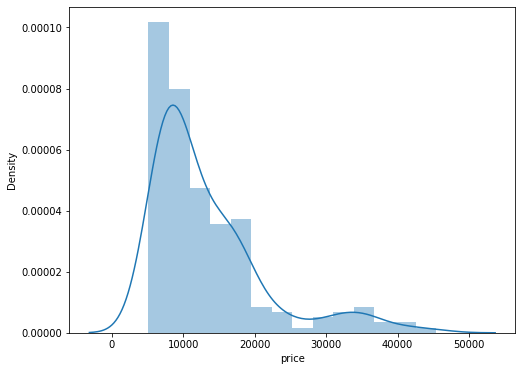

In [ ]:
sns.distplot(df.price)

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

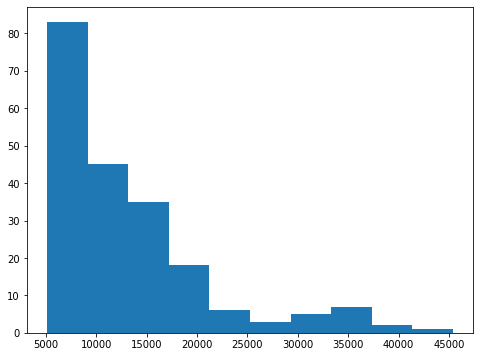

In [ ]:
plt.hist(df.price)

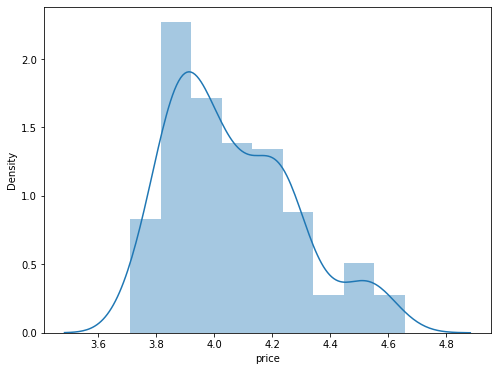

In [ ]:
sns.distplot(np.log10(df.price))

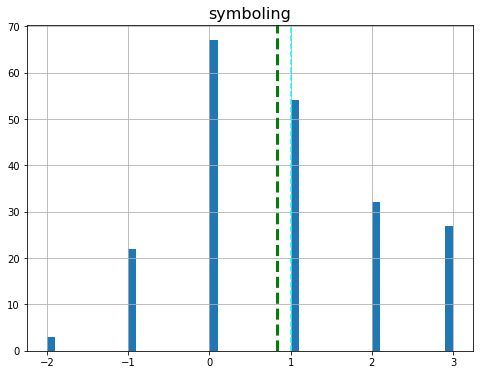

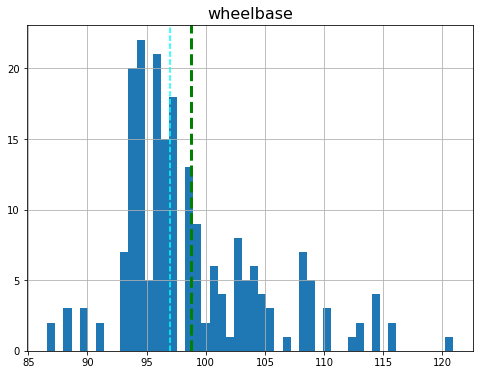

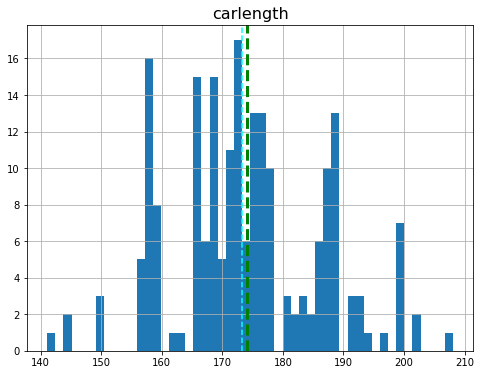

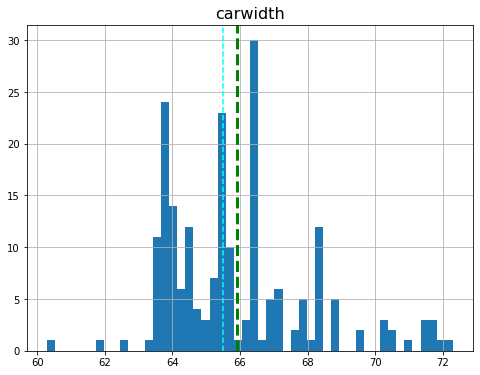

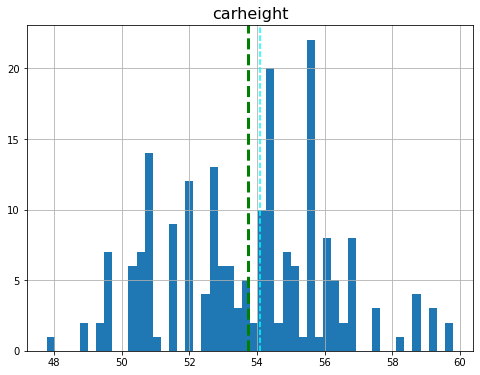

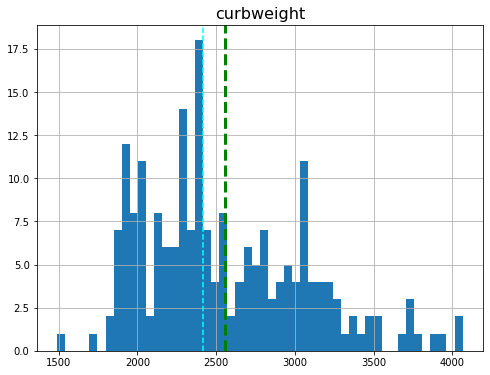

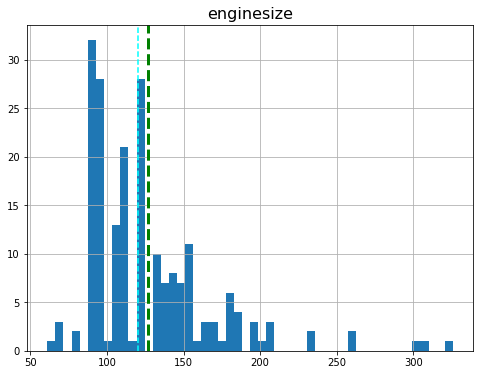

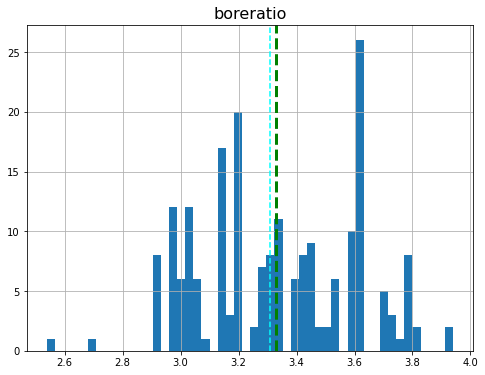

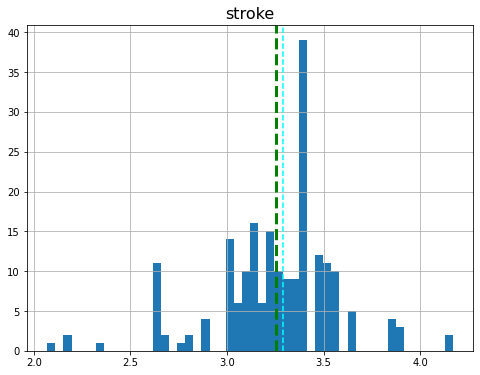

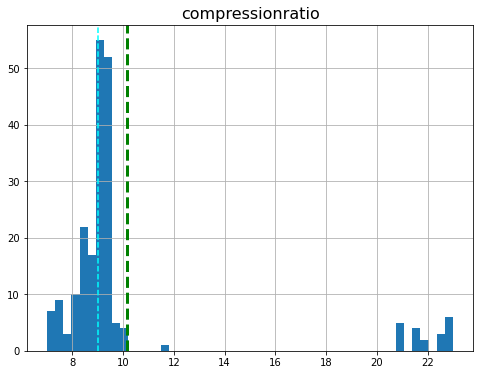

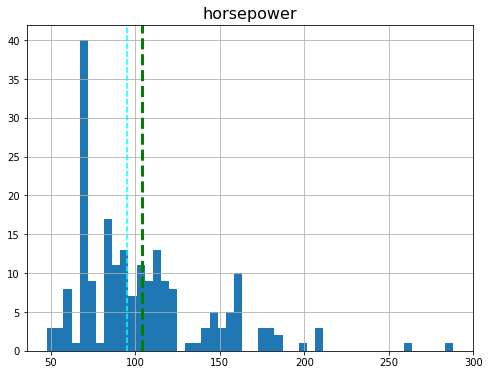

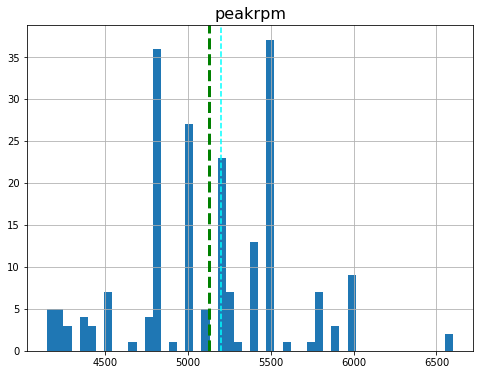

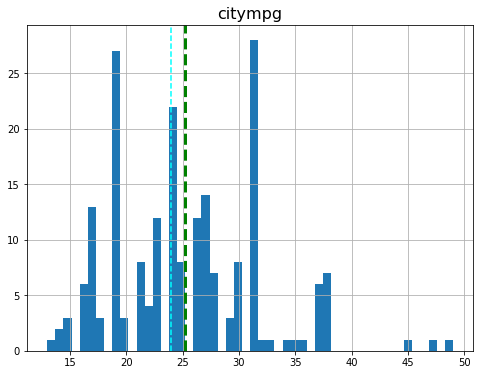

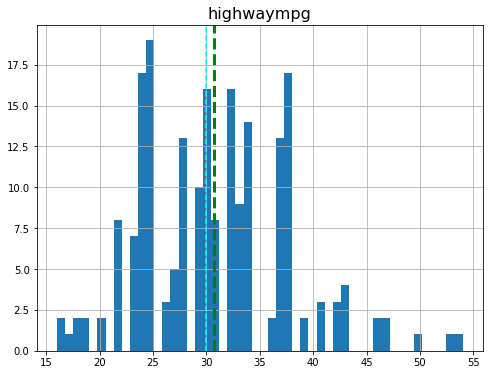

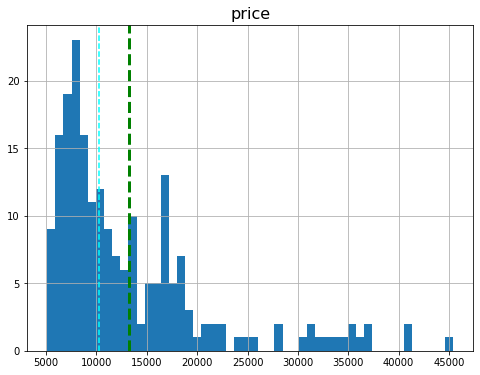

In [ ]:
for col in list(df.describe().columns)[1:]:
  fig= plt.figure()
  df[col].hist(bins=50)
  plt.axvline(df[col].mean(), c='g', linestyle='--',linewidth=3)
  plt.axvline(df[col].median(),c='cyan',linestyle='--')
  plt.title(col,fontsize=16); 
plt.show()

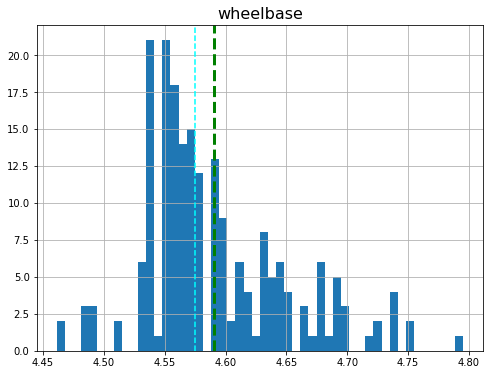

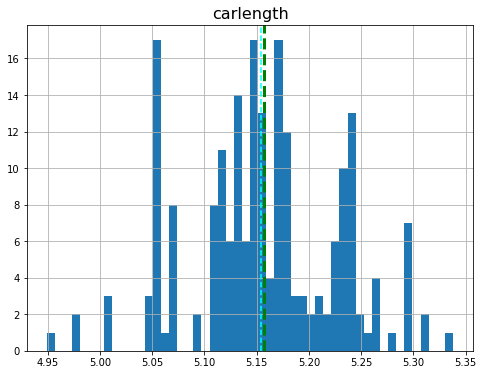

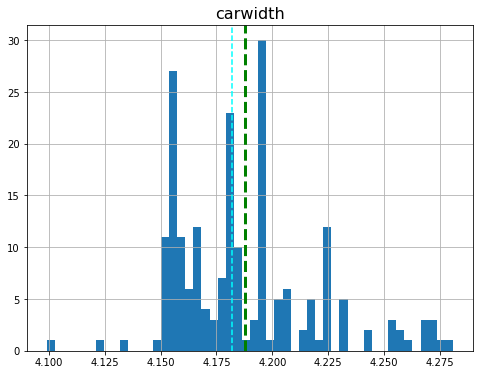

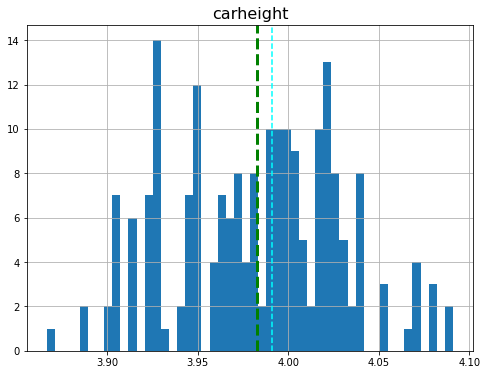

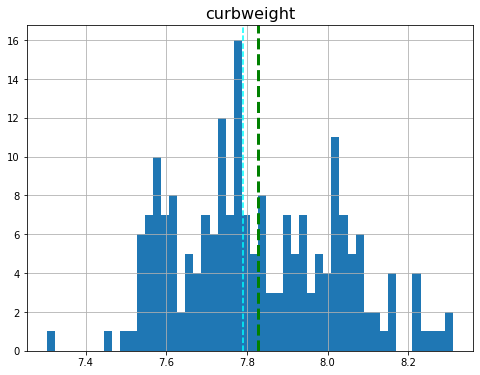

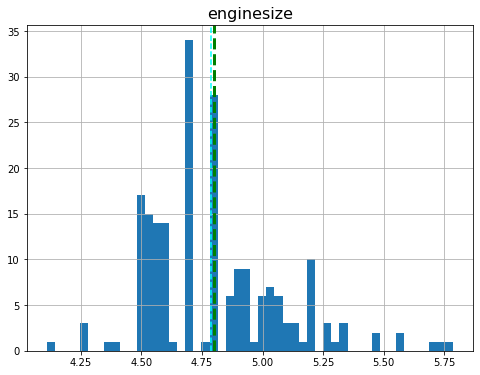

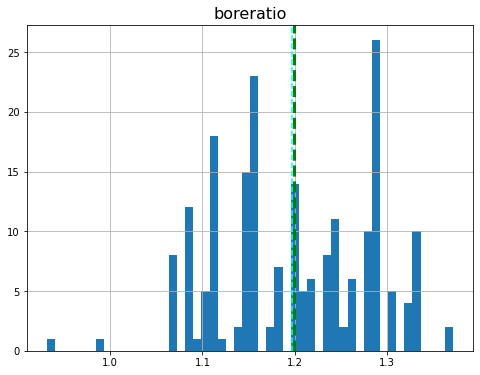

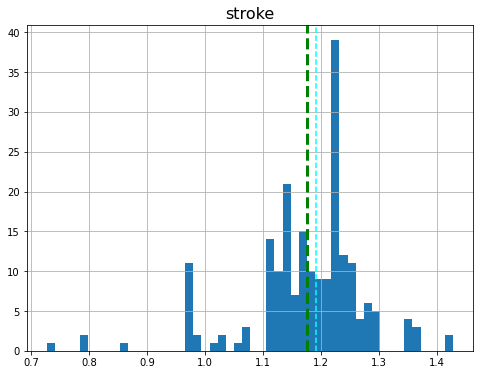

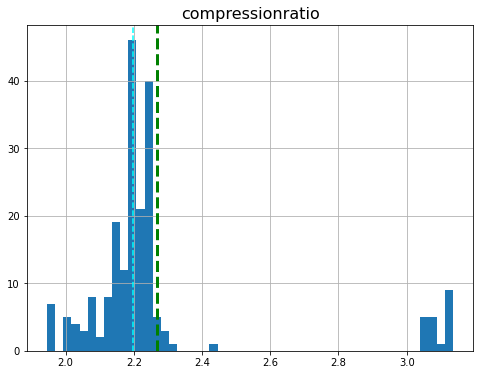

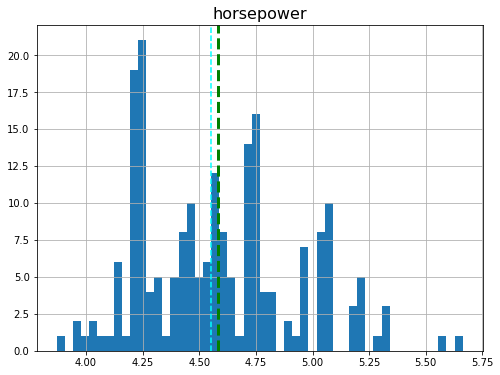

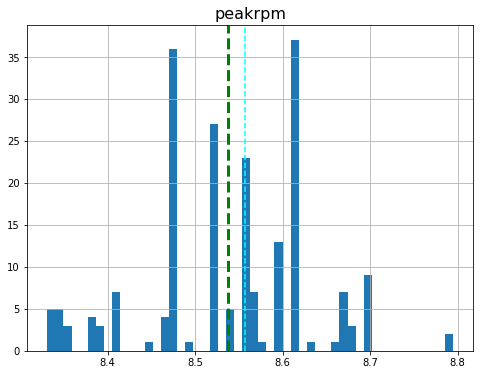

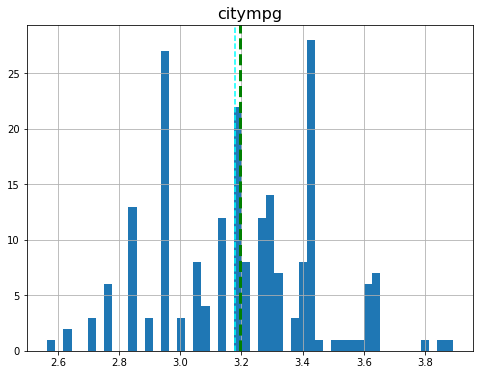

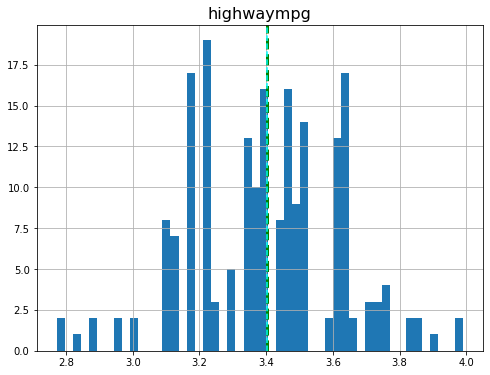

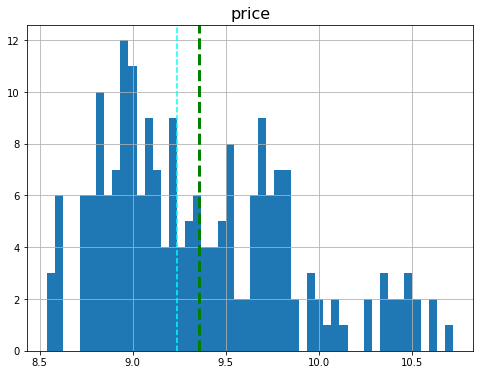

In [ ]:
for col in list(df.describe().columns)[2:]:
  fig= plt.figure()
  a=np.log(df[col])
  a.hist(bins=50)
  plt.axvline(a.mean(), c='g', linestyle='--',linewidth=3)
  plt.axvline(a.median(),c='cyan',linestyle='--')
  plt.title(col,fontsize=16); 
plt.show()

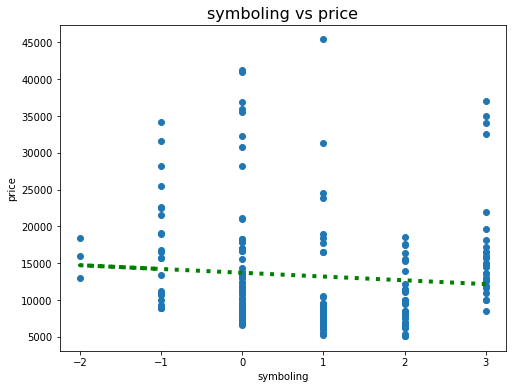

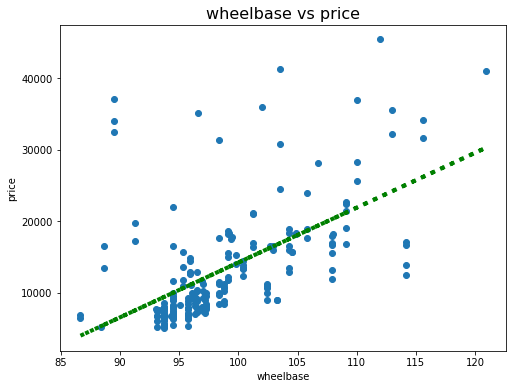

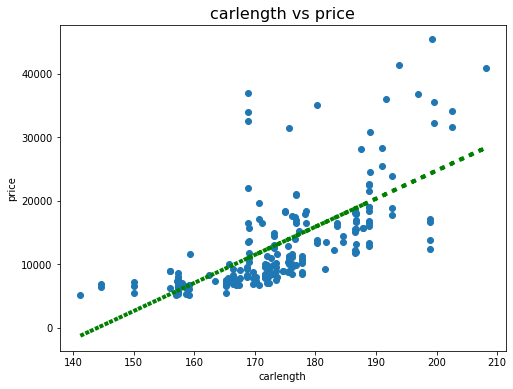

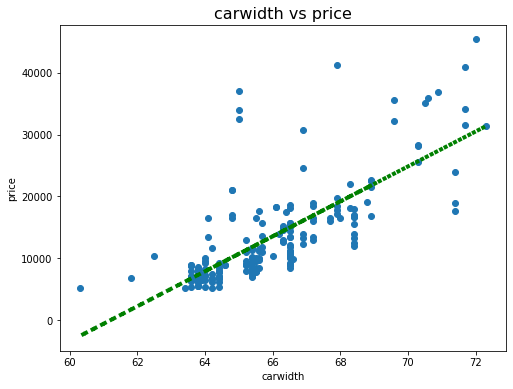

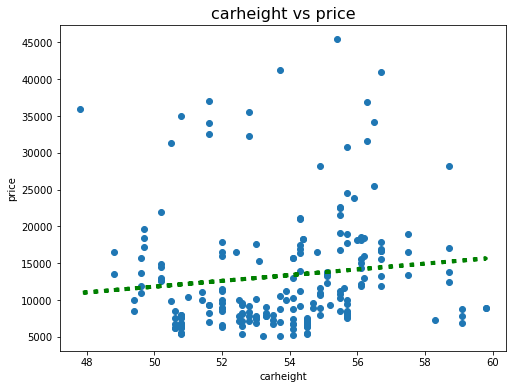

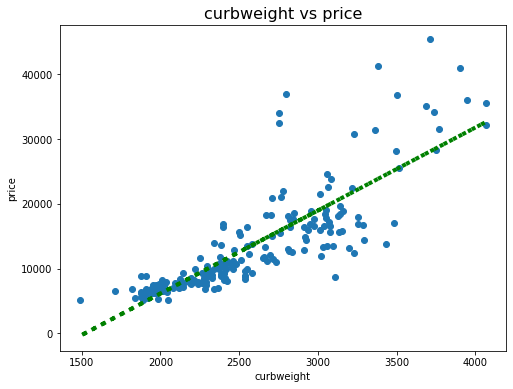

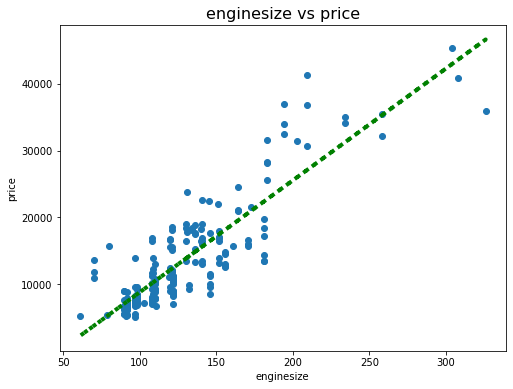

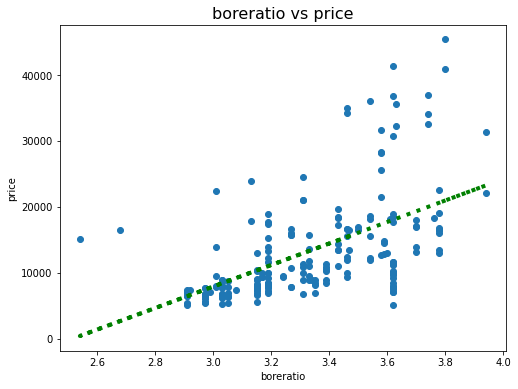

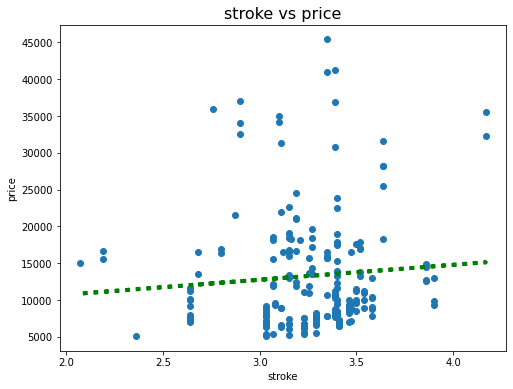

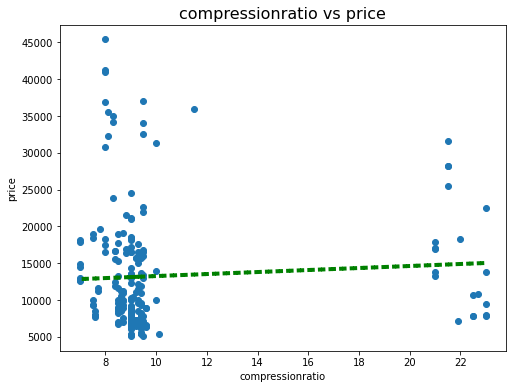

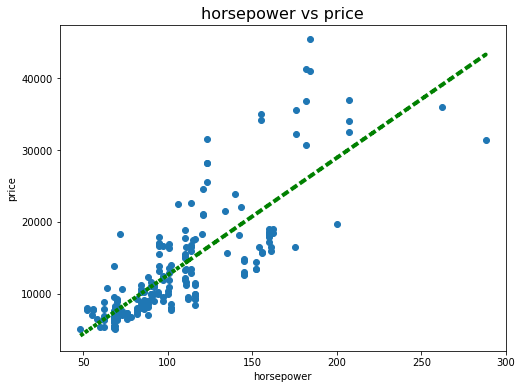

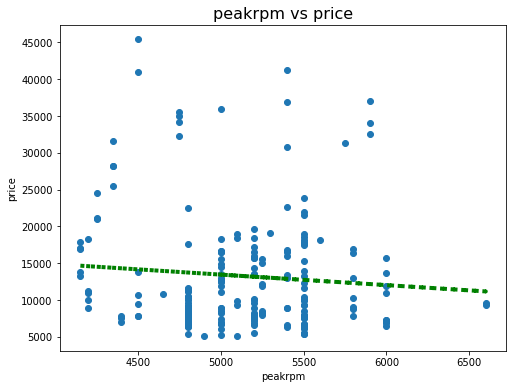

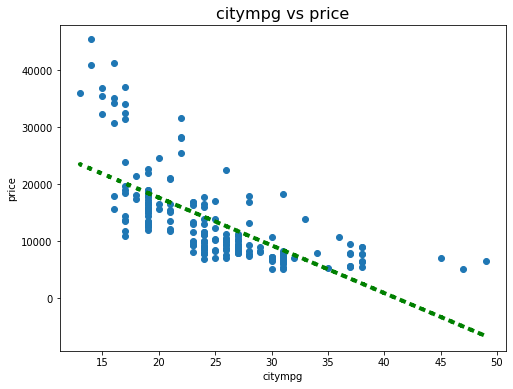

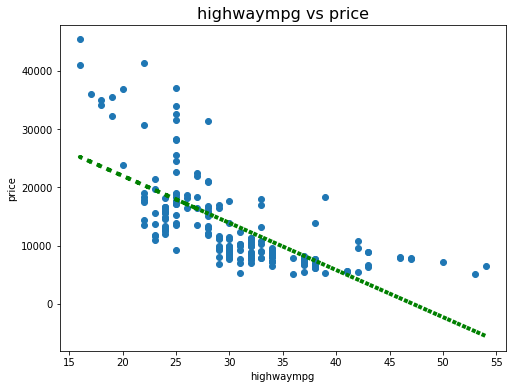

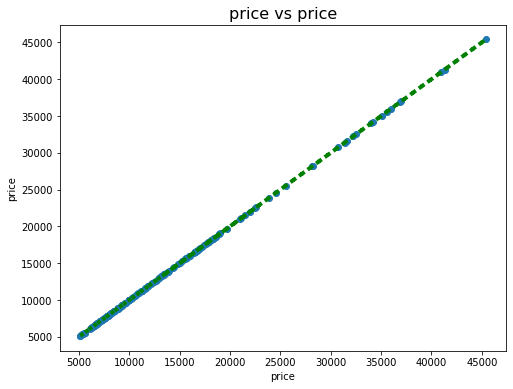

In [ ]:
for col in list(df.describe().columns)[1:]:
  plt.scatter(x=df[col],y=df.price)
  plt.xlabel(col)
  plt.ylabel('price')
  plt.title(col+' vs price',fontsize=16)

  theta=np.polyfit(df[col],df['price'],1)
  y_cap=np.poly1d(theta)(df[col])
  plt.plot(df[col],y_cap,color='green',linewidth=4, linestyle=':')

  plt.show()

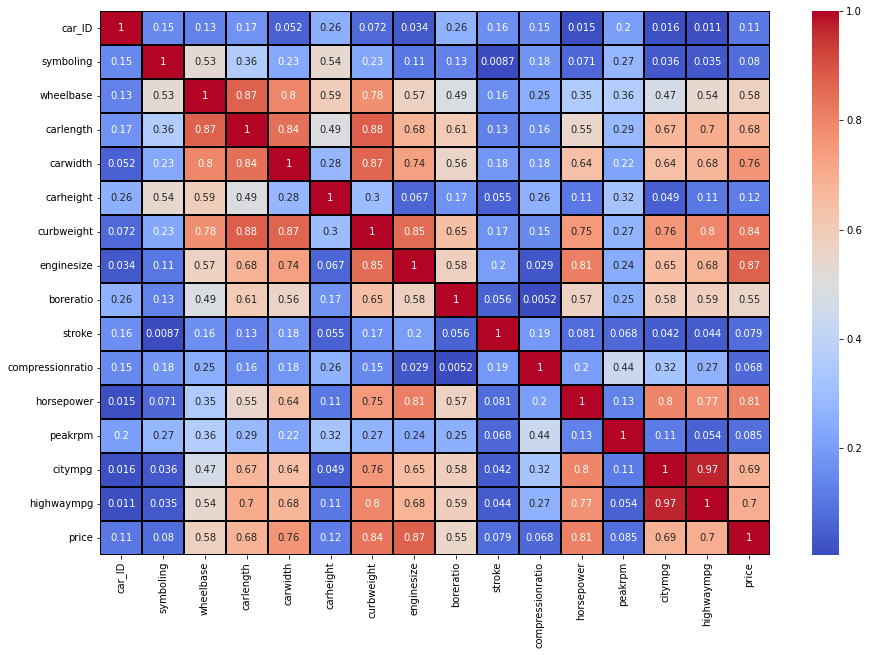

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()),annot=True,cmap='coolwarm',linewidth=1,linecolor='black')

In [ ]:
data=df.copy()

In [ ]:
data['milage']=0.6*df['citympg']+0.4*df['highwaympg']
data['area']=df['carwidth']*df['carlength']

In [ ]:
data.drop(['citympg','highwaympg','carwidth','carlength'],inplace=True,axis=1)

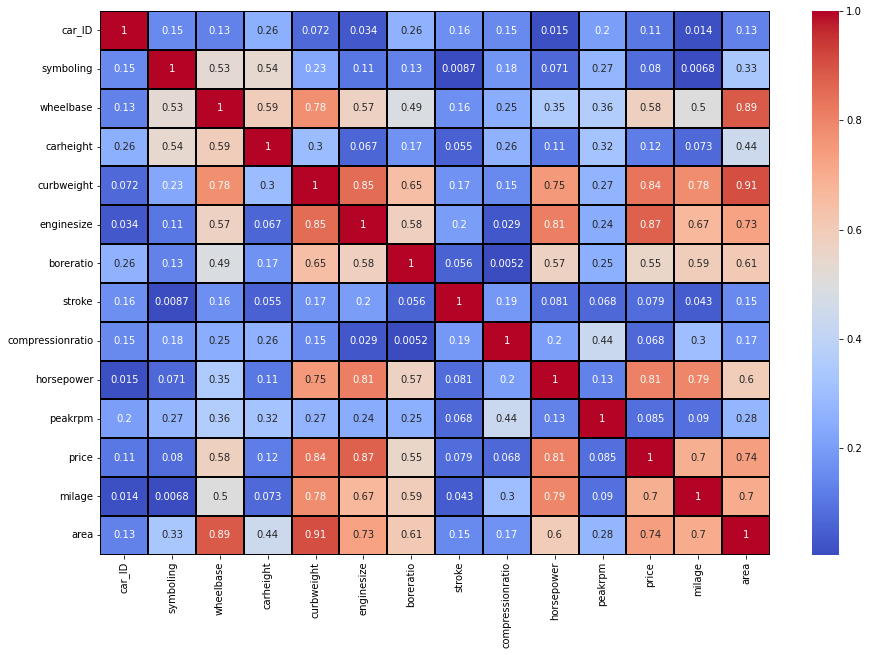

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(data.corr()),annot=True,cmap='coolwarm',linewidth=1,linecolor='black')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
  print(1)
  vif=pd.DataFrame()
  vif['Features']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

In [ ]:
cal_vif(data[[i for i in data.describe().columns if i not in ['car_ID','price','wheelbase','boreratio','carheight','curbweight','symboling','area','peakrpm','stroke','horsepower']]])

1


,Features,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,milage,8.201171


In [ ]:
data.drop(['car_ID','wheelbase','boreratio','carheight','curbweight','symboling','area','peakrpm','stroke','horsepower'],inplace=True,axis=1)

In [ ]:
df.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
data.describe().columns

Index(['enginesize', 'compressionratio', 'price', 'milage'], dtype='object')

In [ ]:
data.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [ ]:
data['company']=data['CarName'].str.split(' ',expand=True)[0]
data['company'].replace({'Nissan':'nissan','porcshce':'porsche','toyouta':'toyota', 'vw':'volkswagen', 'vokswagen':'volkswagen', 'maxda':'mazda'}, inplace=True)
data['company']= data['company'].str.title()

In [ ]:
data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'compressionratio', 'price', 'milage',
       'company'],
      dtype='object')

In [ ]:
data_mean =data.groupby(['company']).agg({'price':'mean'}).sort_values(by='company').reset_index()


In [ ]:
data_mean.rename(columns={'price':'price_mean'},inplace=True)



In [ ]:
data=data.merge(data_mean, on= 'company', how='inner')

In [ ]:
data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'compressionratio', 'price', 'milage',
       'company', 'price_mean'],
      dtype='object')

In [ ]:
data['company_cat']=data['price_mean'].apply(lambda x: 0 if x<12000 else (1 if 12000<=x <24000 else 2))

In [ ]:
count=data['fuelsystem'].value_counts().sort_index()
count

1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: fuelsystem, dtype: int64

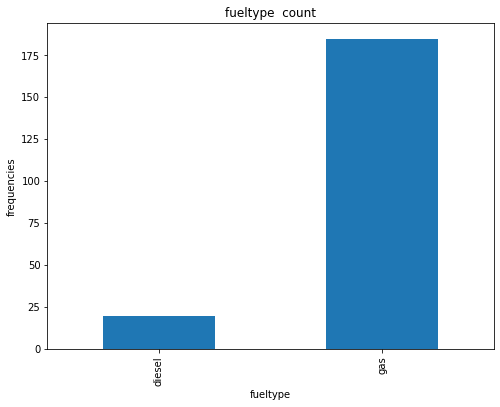

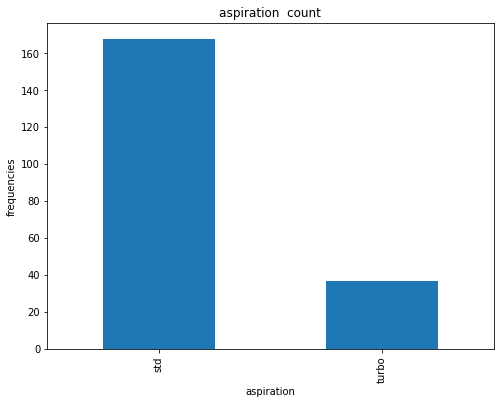

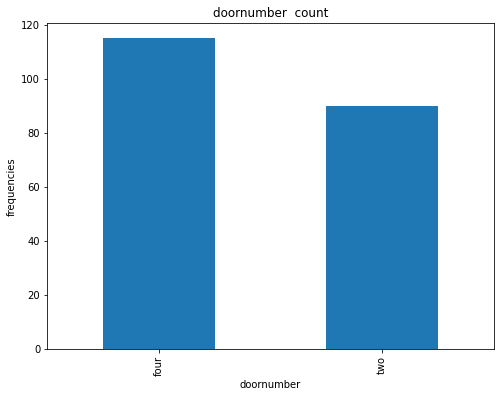

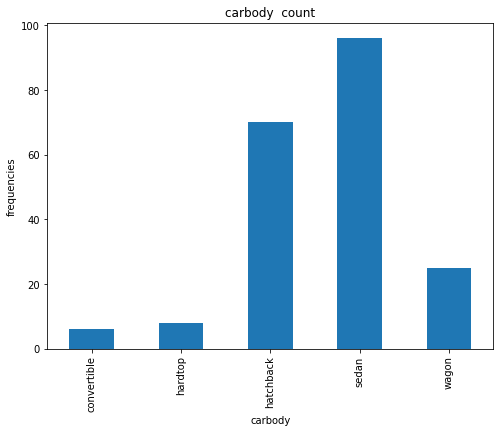

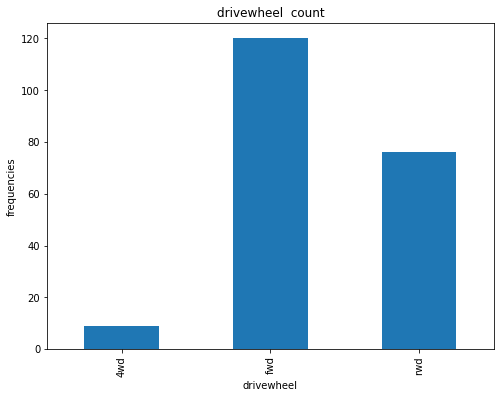

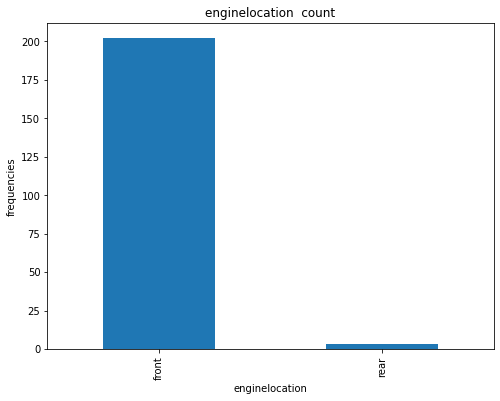

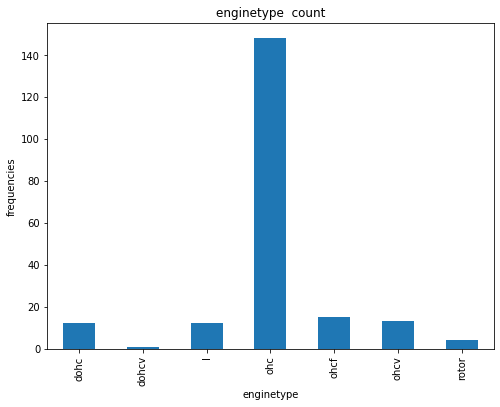

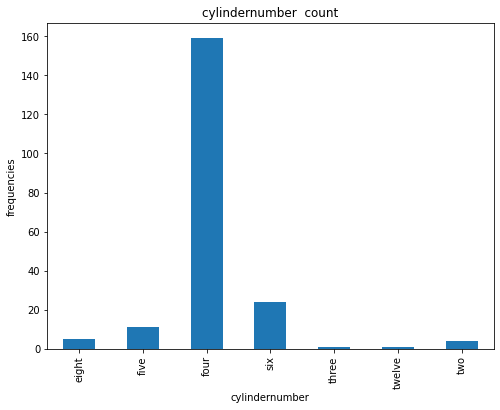

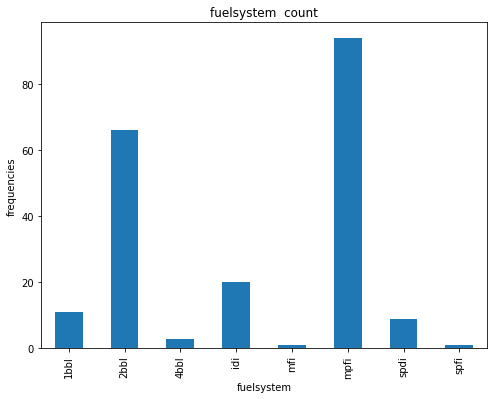

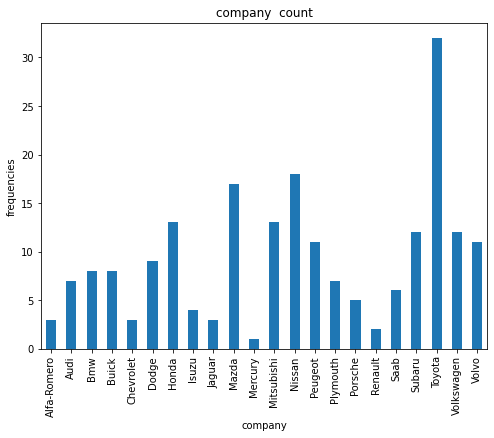

In [ ]:
for col in list(data.describe(include=['category','object']).columns)[1:]:
  count=data[col].value_counts().sort_index()
  fig=plt.figure()
  count.plot(kind='bar')
  plt.xlabel(col)
  plt.ylabel('frequencies')
  plt.title(col+'  count')

<Figure size 576x432 with 0 Axes>

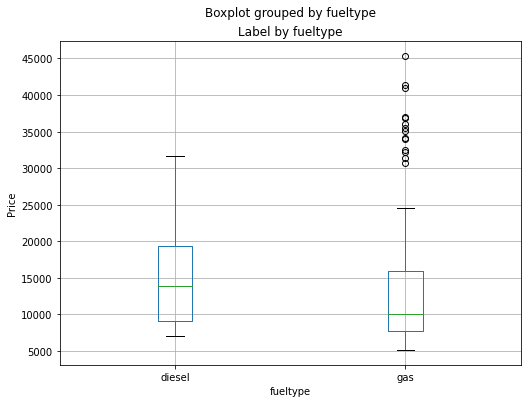

<Figure size 576x432 with 0 Axes>

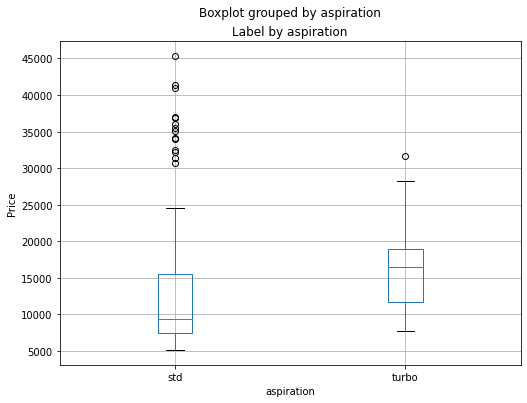

<Figure size 576x432 with 0 Axes>

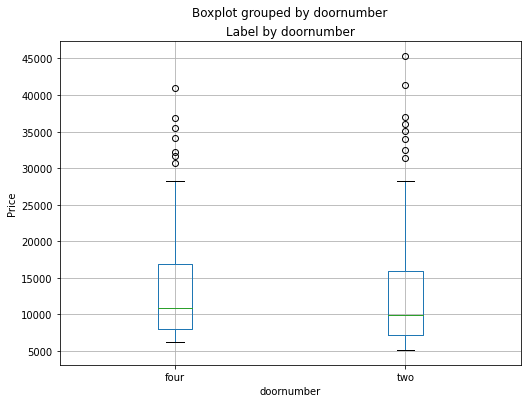

<Figure size 576x432 with 0 Axes>

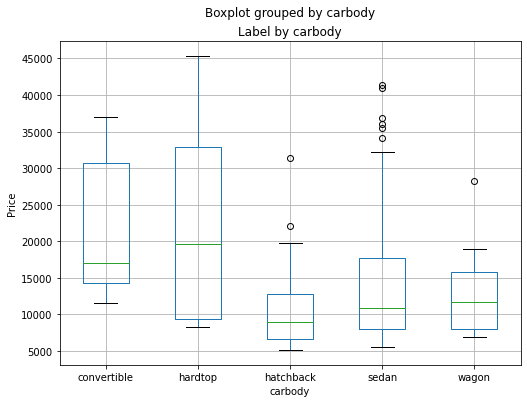

<Figure size 576x432 with 0 Axes>

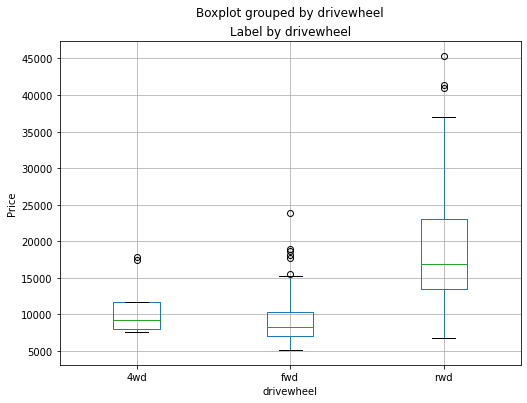

<Figure size 576x432 with 0 Axes>

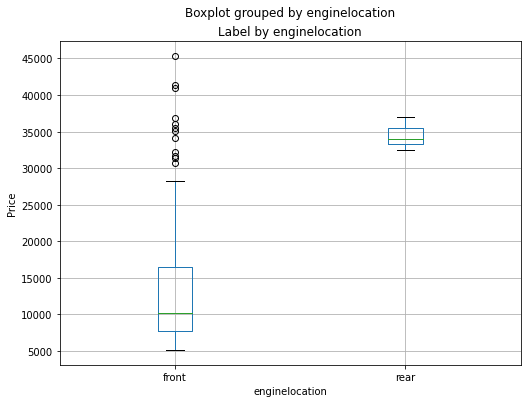

<Figure size 576x432 with 0 Axes>

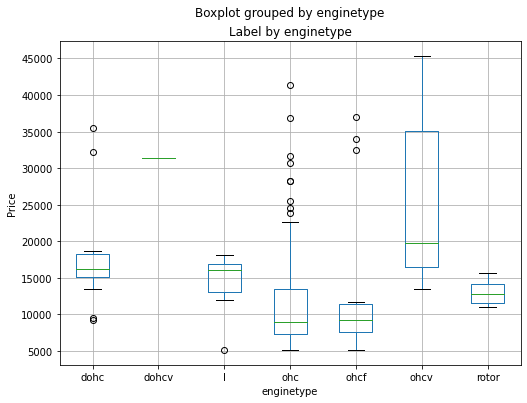

<Figure size 576x432 with 0 Axes>

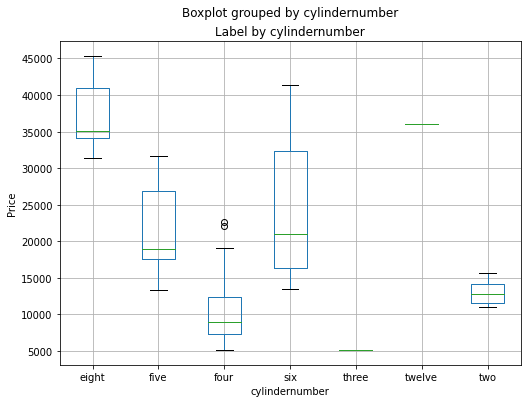

<Figure size 576x432 with 0 Axes>

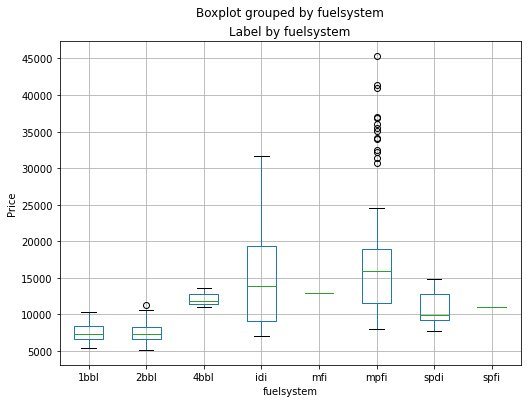

<Figure size 576x432 with 0 Axes>

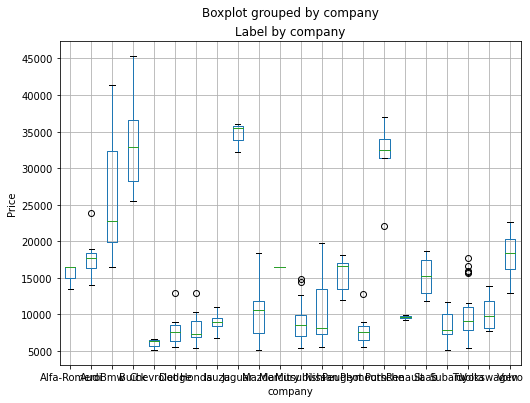

In [ ]:
for col in list(data.describe(include=['category','object']).columns)[1:]:
  fig=plt.figure()
  data.boxplot(column='price',by=col)
  plt.ylabel('Price')
  plt.title('Label by '+ col)
  
plt.show()

In [ ]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [ ]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [ ]:
data.describe(include='O').columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

In [ ]:
encode={ 'fueltype':{'diesel':0,'gas':1},
        'aspiration': {'turbo':1, 'std': 0},
        'doornumber': {'four':4, 'two': 2},
        'drivewheel': {'fwd': 0,'4wd': 0, 'rwd': 1},
        'cylindernumber':{'four': 4,'six': 6, 'five':5, 'eight':8,'two':2,'twelve':12,'three':3}
        }

In [ ]:
data.replace(encode,inplace=True)

In [ ]:
data=pd.get_dummies(data,columns=['carbody','enginetype','fuelsystem'], prefix=['body','engine','fuel'])

In [ ]:
data.drop(['price_mean','CarName','company','enginelocation'],axis=1,inplace=True)

In [ ]:
data.drop(['engine_rotor','engine_dohcv','fuel_4bbl','fuel_mfi','fuel_spfi'],axis=1, inplace=True)

In [ ]:
len(data.columns)

25

# Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
X=data[[col for col in data.columns if col not in ['price']]]
y=data['price']

# linear Regression

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.1,random_state=0)

In [ ]:
X_test.shape

(21, 24)

In [ ]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [ ]:
y_train=np.log10(y_train)
y_test=np.log10(y_test)

In [ ]:
LR=LinearRegression().fit(X_train,y_train)

In [ ]:
LR_score=LR.score(X_train,y_train)

In [ ]:
LR.score(X_test,y_test)

0.8385875812520507

In [ ]:
y_pred_test=LR.predict(X_test)

In [ ]:
LR_MSE=mean_squared_error(10**(y_test),10**(y_pred_test))


In [ ]:
print('MSE is ',LR_MSE)
print('RMSE is ', np.sqrt(LR_MSE))

MSE is  8175655.246544638
RMSE is  2859.3102746194995


In [ ]:
LR_r2=r2_score(10**y_test,10**y_pred_test)
print('R2 Score on y_test ',LR_r2 )
LR_ra2= 1-((1-(LR_r2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )
print('adjusted r2 is',LR_ra2)

R2 Score on y_test  0.795337625542995
adjusted r2 is 0.5770995897144628


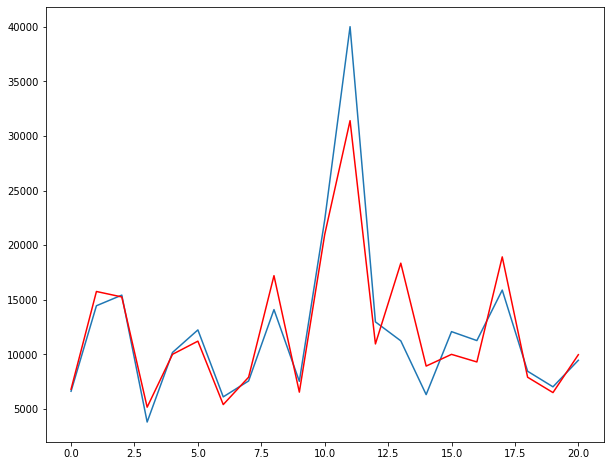

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**y_test), color='red')

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
las=Lasso(alpha=0.1)
las.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
las_score= las.score(X_train,y_train)

In [ ]:
y_pred_test=las.predict(X_test)

In [ ]:
las_MSE=mean_squared_error(10**(y_test),10**(y_pred_test))

In [ ]:
print('MSE is ', las_MSE )
print('RMSE is ', np.sqrt(las_MSE))

MSE is  19067301.833001498
RMSE is  4366.612168833121


In [ ]:
las_r2=r2_score(10**y_test,10**y_pred_test)
print('R2 Score on y_test ',las_r2 )
las_ra2= 1-((1-(las_r2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )
print('adjusted r2 is', las_ra2)

R2 Score on y_test  0.5226854423344497
adjusted r2 is 0.16349442206282871


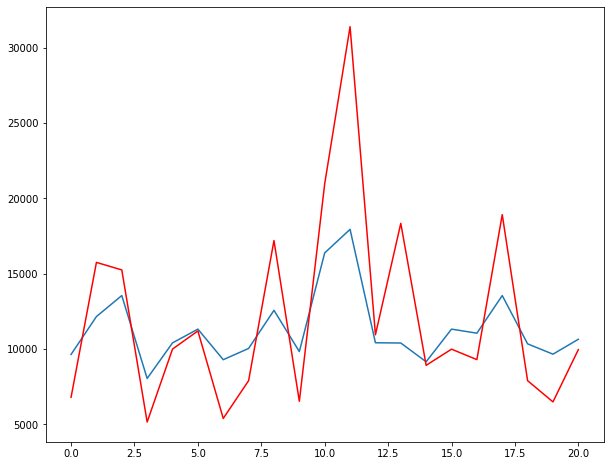

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**y_test), color='red')

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
reg=Ridge(alpha=2)
reg.fit(X_train,y_train)

Ridge(alpha=2)

In [ ]:
reg_score=reg.score(X_train,y_train)
y_pred_test= reg.predict(X_test)

In [ ]:
reg_MSE=mean_squared_error(10**(y_test),10**(y_pred_test))

In [ ]:
print('MSE is ', reg_MSE )
print('RMSE is ', np.sqrt(reg_MSE))

MSE is  4813958.488880149
RMSE is  2194.073492132875


In [ ]:
reg_r2=r2_score(10**y_test,10**y_pred_test)
print('R2 Score on y_test ',reg_r2 )
reg_ra2= 1-((1-(reg_r2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )
print('adjusted r2 is', reg_ra2)

R2 Score on y_test  0.879491472528998
adjusted r2 is 0.7393173634966932


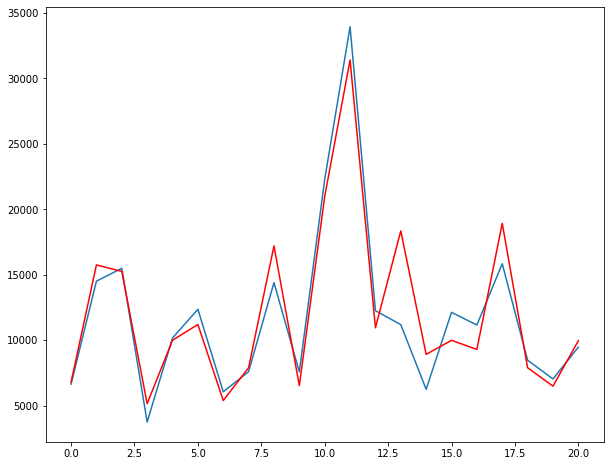

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**y_test), color='red')

# Cross Validation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-6,1e-4,1e-3, 1e-2,1e-1,1,5,10,20,30,40,50,60,100]}
las_regressor=GridSearchCV(lasso,parameters, scoring= 'neg_mean_squared_error',cv=5)
las_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-06, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print('using', las_regressor.best_params_,'the negative mean squared error ', las_regressor.best_score_)

using {'alpha': 0.001} the negative mean squared error  -0.004920235543672903


In [ ]:
las_reg_score= las_regressor.score(X_train,y_train)

In [ ]:
y_pred_test= las_regressor.predict (X_test)

In [ ]:
las_reg_MSE=mean_squared_error(10**(y_test),10**(y_pred_test))

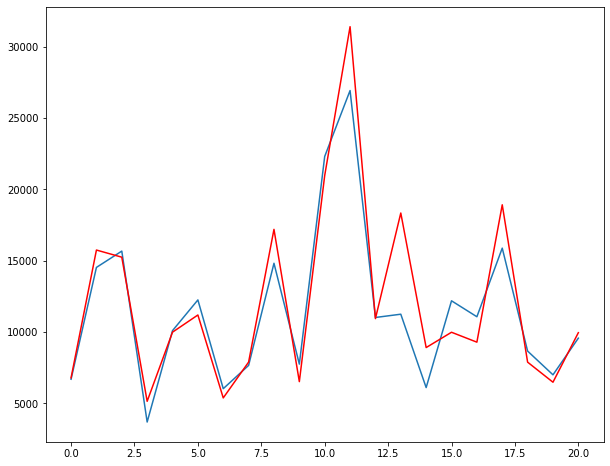

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**y_test), color='red')

In [ ]:
las_reg_r2=r2_score(10**y_test,10**y_pred_test)
print('R2 Score on y_test ',reg_r2 )
las_reg_ra2= 1-((1-(las_reg_r2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )
print('adjusted r2 is', reg_ra2)

R2 Score on y_test  0.879491472528998
adjusted r2 is 0.7393173634966932


# Ridge CV

In [ ]:
rid=Ridge()
parameters={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-6,1e-4,1e-3, 1e-2,1e-1,1,5,10,20,30,40,50,60,100]}
rid_regressor=GridSearchCV(rid,parameters,scoring='neg_mean_squared_error', cv=5)
rid_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-06, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print('using',rid_regressor.best_params_,'getting the least error as,', rid_regressor.best_score_)

using {'alpha': 10} getting the least error as, -0.004900062868318224


In [ ]:
rid_reg_score= rid_regressor.score(X_train,y_train)

In [ ]:
y_pred_test= rid_regressor.predict (X_test)

In [ ]:
rid_reg_MSE=mean_squared_error(10**(y_test),10**(y_pred_test))

In [ ]:
rid_reg_r2=r2_score(10**y_test,10**y_pred_test)
print('R2 Score on y_test ',rid_reg_r2 )
rid_reg_ra2= 1-((1-(rid_reg_r2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )
print('adjusted r2 is', reg_ra2)

R2 Score on y_test  0.8904445494346284
adjusted r2 is 0.7393173634966932


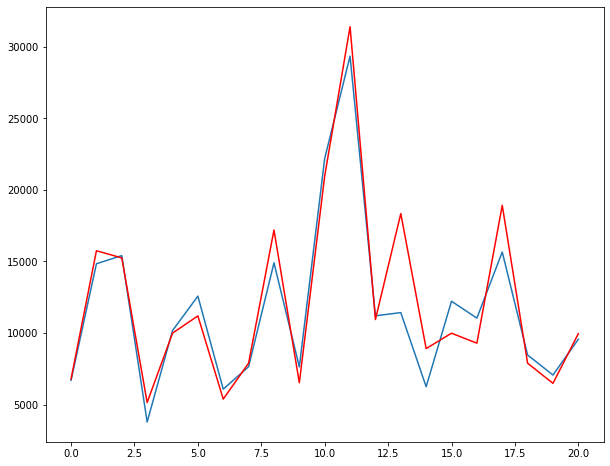

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**y_test), color='red')

# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic= ElasticNet()
parameters={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-6,1e-4,1e-3, 1e-2,1e-1,1,5,10,20,30,40,50,60,100], 'l1_ratio': [0.3,0.4,0.5,0.6,0.7,0.8]}
            
elastic_reg =GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error', cv=5)
elastic_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-06, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50,
                                   60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print('the best values are', elastic_reg.best_params_, 'having the minimum error', elastic_reg.best_score_)

the best values are {'alpha': 0.01, 'l1_ratio': 0.3} having the minimum error -0.00481982991414178


In [ ]:
elastic_reg_score=elastic_reg.score(X_train,y_train)

In [ ]:
y_pred_test=elastic_reg.predict(X_test)

In [ ]:
elastic_reg_MSE=mean_squared_error(10**(y_test),10**(y_pred_test))

In [ ]:
elastic_reg_r2=r2_score(10**y_test,10**y_pred_test)
print('R2 Score on y_test ',elastic_reg_r2 )
elastic_reg_ra2= 1-((1-(elastic_reg_r2**2)) * ((X_train.shape[0]-1)/ (X_train.shape[0]-X_train.shape[1]-1)) )
print('adjusted r2 is', elastic_reg_ra2)

R2 Score on y_test  0.8628019141444089
adjusted r2 is 0.7058501080401247


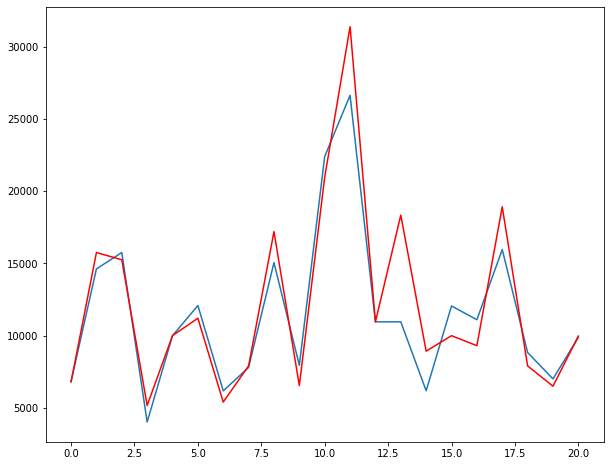

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(10**(y_pred_test))
plt.plot(np.array(10**y_test), color='red')

In [ ]:
dat= {  'model':['LinearRegression','Lasso','Ridge','Lasso_CV','Ridge_CV','Elastic Net'],
        'score':[LR_score,las_score,reg_score,las_reg_score, rid_reg_score, elastic_reg_score], 
        'MSE': [LR_MSE,las_MSE,reg_MSE,las_reg_MSE, rid_reg_MSE, elastic_reg_MSE],
        'RMSE': [np.sqrt(LR_MSE),np.sqrt(las_MSE),np.sqrt(reg_MSE),np.sqrt(las_reg_MSE), np.sqrt(rid_reg_MSE),np.sqrt(elastic_reg_MSE)],
        'r2_score' : [LR_r2, las_r2, reg_r2,las_reg_r2, rid_reg_r2, elastic_reg_r2],
        'adjR2': [LR_ra2, las_ra2, reg_ra2,las_reg_ra2, rid_reg_ra2, elastic_reg_ra2]
       }

In [ ]:
ff=pd.DataFrame(dat)

In [ ]:
ff

,model,score,MSE,RMSE,r2_score,adjR2
0,LinearRegression,0.928283,8.175655e+06,2859.310275,0.795338,0.577100
1,Lasso,0.608019,1.906730e+07,4366.612169,0.522685,0.163494
2,Ridge,0.927790,4.813958e+06,2194.073492,0.879491,0.739317
3,Lasso_CV,-0.003663,5.273705e+06,2296.454982,0.867983,0.716170
4,Ridge_CV,-0.003626,4.376416e+06,2091.988416,0.890445,0.761630
5,Elastic Net,-0.003793,5.480657e+06,2341.080280,0.862802,0.705850
